In [1]:
#Import warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
import re
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
df = pd.read_excel('/kaggle/input/linkedin-job-posts-insights-dataset/linkedin_job_posts_insights.xlsx')
print(f'Shape of the DataFrame: {df.shape[0]} rows, {df.shape[1]} columns')

Shape of the DataFrame: 31597 rows, 9 columns


In [4]:
df.head()

job_title  \
0     Store Business Manager - DAVID JONES CHERMSIDE   
1                                          Full-time   
2                   Senior Machine Learning Engineer   
3                              Senior Data Scientist   
4  \n            \n        Solution Architect\n  ...   

                               company_name  \
0                                 M.J. Bale   
1                                  Gatesman   
2                           Redwolf + Rosch   
3                                      Bupa   
4  \n            Xybion Digital\n             

                                            location  \
0                    Brisbane, Queensland, Australia   
1                                        Chicago, IL   
2               Adelaide, South Australia, Australia   
3                     Melbourne, Victoria, Australia   
4  \n            Chennai, Tamil Nadu, India\n    ...   

                              hiring_status       date  \
0                     Be an early applicant 2023-04-13   
1                     Be an early applicant 2023-03-31   
2                     Be an early applicant 2023-04-25   
3                     Be an early applicant 2023-04-29   
4  \n         Be an early applicant\n       2023-01-26   

                              seniority_level  \
0                              Not Applicable   
1                                         NaN   
2                            Mid-Senior level   
3                                 Entry level   
4  \n            Mid-Senior level\n             

                                        job_function  \
0                     Sales and Business Development   
1                                                NaN   
2             Engineering and Information Technology   
3             Engineering and Information Technology   
4  \n            Engineering and Information Tech...   

                   employment_type  \
0                        Full-time   
1                              NaN   
2                        Part-time   
3                        Full-time   
4  \n          Full-time\n           

                                            industry  
0                          Government Administration  
1                                                NaN  
2                                Internet Publishing  
3               Technology, Information and Internet  
4  \n          IT Services and IT Consulting, Sof...

In [5]:
df.shape

(31597, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31597 entries, 0 to 31596
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_title        31571 non-null  object        
 1   company_name     30657 non-null  object        
 2   location         31588 non-null  object        
 3   hiring_status    31597 non-null  object        
 4   date             31597 non-null  datetime64[ns]
 5   seniority_level  30289 non-null  object        
 6   job_function     30007 non-null  object        
 7   employment_type  30006 non-null  object        
 8   industry         29586 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.2+ MB


In [7]:
df.dtypes

job_title                  object
company_name               object
location                   object
hiring_status              object
date               datetime64[ns]
seniority_level            object
job_function               object
employment_type            object
industry                   object
dtype: object

In [8]:
df.describe(include = "all")

job_title             company_name  \
count                  31571                    30657   
unique                  6112                     7201   
top     Full Stack Developer  Recruiting from Scratch   
freq                     718                      521   
mean                     NaN                      NaN   
min                      NaN                      NaN   
25%                      NaN                      NaN   
50%                      NaN                      NaN   
75%                      NaN                      NaN   
max                      NaN                      NaN   

                               location          hiring_status  \
count                             31588                  31597   
unique                             2043                     47   
top     London, England, United Kingdom  Be an early applicant   
freq                               1994                  14423   
mean                                NaN                    NaN   
min                                 NaN                    NaN   
25%                                 NaN                    NaN   
50%                                 NaN                    NaN   
75%                                 NaN                    NaN   
max                                 NaN                    NaN   

                                 date   seniority_level  \
count                           31597             30289   
unique                            NaN                25   
top                               NaN  Mid-Senior level   
freq                              NaN              8651   
mean    2023-03-12 20:52:44.199132928               NaN   
min               2021-05-27 00:00:00               NaN   
25%               2023-02-23 00:00:00               NaN   
50%               2023-03-20 00:00:00               NaN   
75%               2023-04-08 00:00:00               NaN   
max               2023-04-29 00:00:00               NaN   

                                  job_function employment_type  \
count                                    30007           30006   
unique                                     542              18   
top     Engineering and Information Technology       Full-time   
freq                                      7141           18305   
mean                                       NaN             NaN   
min                                        NaN             NaN   
25%                                        NaN             NaN   
50%                                        NaN             NaN   
75%                                        NaN             NaN   
max                                        NaN             NaN   

                                    industry  
count                                  29586  
unique                                   947  
top     Technology, Information and Internet  
freq                                    3039  
mean                                     NaN  
min                                      NaN  
25%                                      NaN  
50%                                      NaN  
75%                                      NaN  
max                                      NaN

In [9]:
df.describe()

date
count                          31597
mean   2023-03-12 20:52:44.199132928
min              2021-05-27 00:00:00
25%              2023-02-23 00:00:00
50%              2023-03-20 00:00:00
75%              2023-04-08 00:00:00
max              2023-04-29 00:00:00

In [10]:
df.nunique()

job_title          6112
company_name       7201
location           2043
hiring_status        47
date                237
seniority_level      25
job_function        542
employment_type      18
industry            947
dtype: int64

In [11]:
df.columns

Index(['job_title', 'company_name', 'location', 'hiring_status', 'date',
       'seniority_level', 'job_function', 'employment_type', 'industry'],
      dtype='object')

<Axes: >

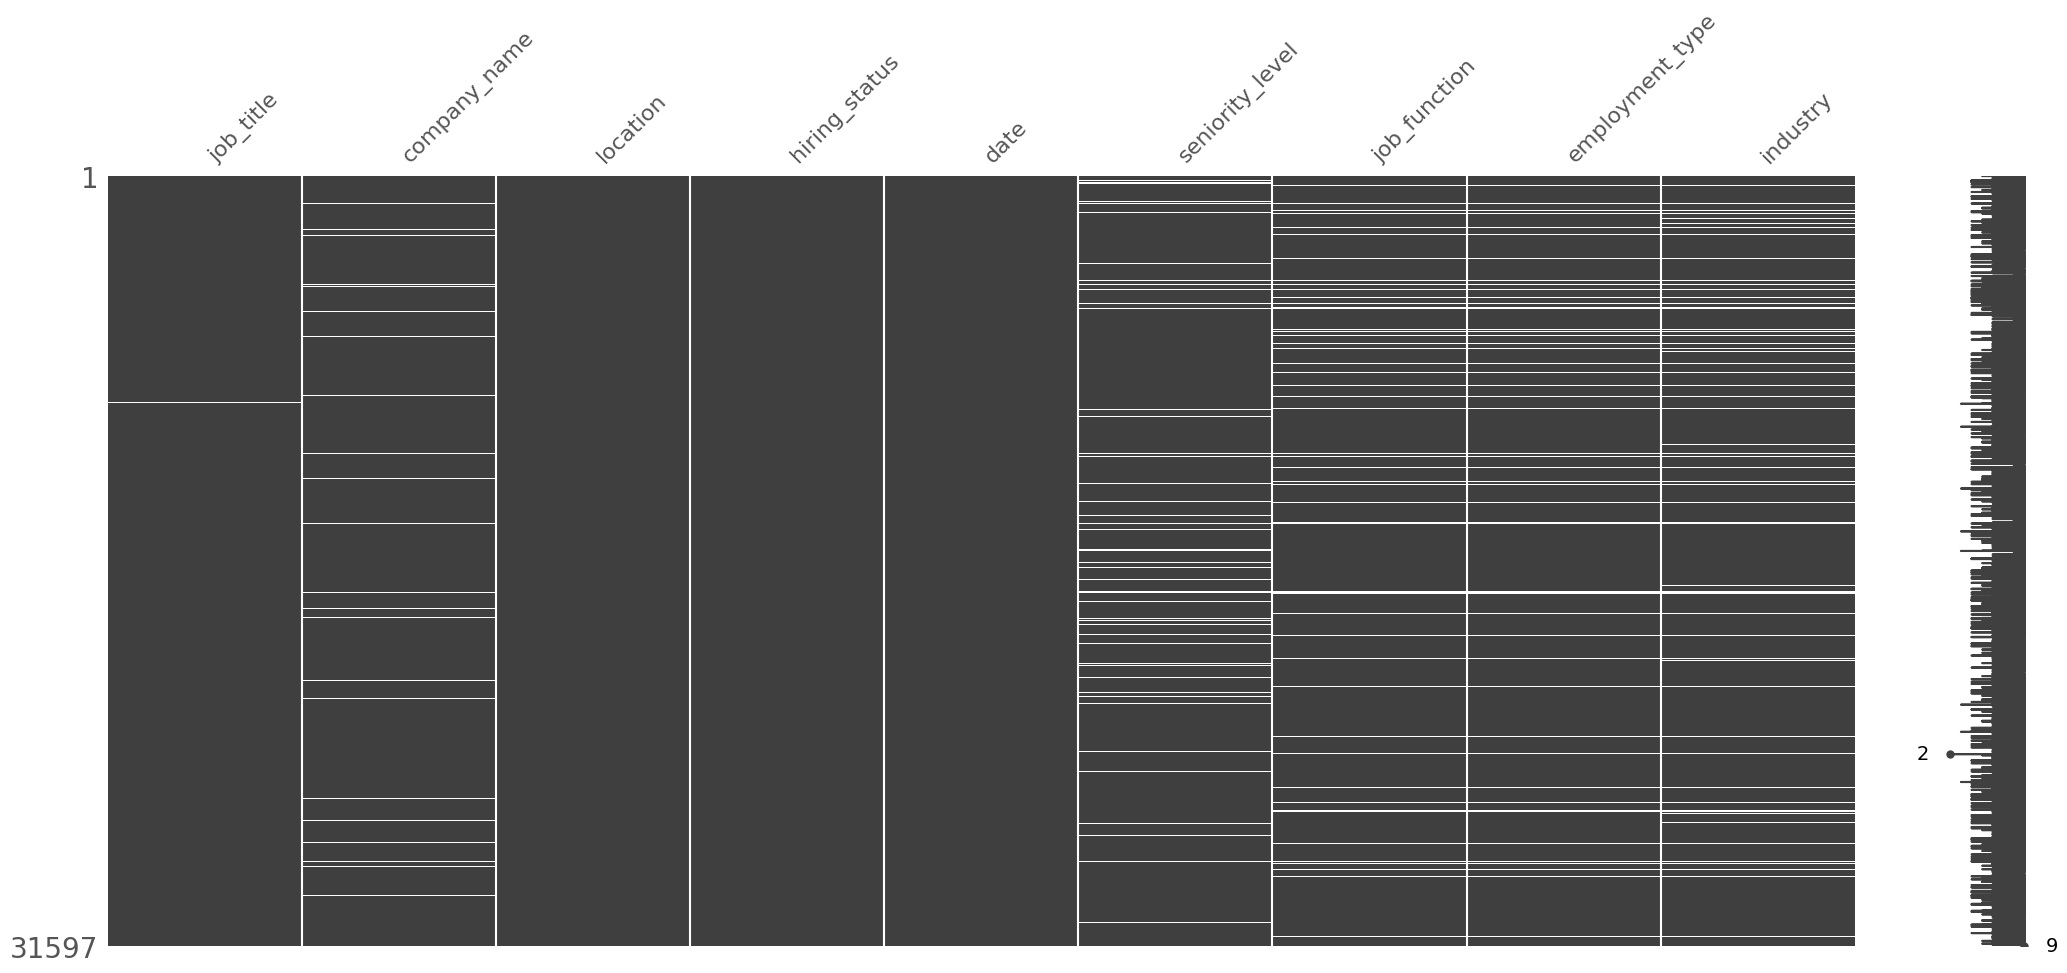

In [12]:
import missingno as msno
msno.matrix(df)

In [13]:
df.isnull().sum()

job_title            26
company_name        940
location              9
hiring_status         0
date                  0
seniority_level    1308
job_function       1590
employment_type    1591
industry           2011
dtype: int64

In [14]:
df.isnull().sum() / len(df) * 100

job_title          0.082286
company_name       2.974966
location           0.028484
hiring_status      0.000000
date               0.000000
seniority_level    4.139634
job_function       5.032123
employment_type    5.035288
industry           6.364528
dtype: float64

In [15]:
df.head()

job_title  \
0     Store Business Manager - DAVID JONES CHERMSIDE   
1                                          Full-time   
2                   Senior Machine Learning Engineer   
3                              Senior Data Scientist   
4  \n            \n        Solution Architect\n  ...   

                               company_name  \
0                                 M.J. Bale   
1                                  Gatesman   
2                           Redwolf + Rosch   
3                                      Bupa   
4  \n            Xybion Digital\n             

                                            location  \
0                    Brisbane, Queensland, Australia   
1                                        Chicago, IL   
2               Adelaide, South Australia, Australia   
3                     Melbourne, Victoria, Australia   
4  \n            Chennai, Tamil Nadu, India\n    ...   

                              hiring_status       date  \
0                     Be an early applicant 2023-04-13   
1                     Be an early applicant 2023-03-31   
2                     Be an early applicant 2023-04-25   
3                     Be an early applicant 2023-04-29   
4  \n         Be an early applicant\n       2023-01-26   

                              seniority_level  \
0                              Not Applicable   
1                                         NaN   
2                            Mid-Senior level   
3                                 Entry level   
4  \n            Mid-Senior level\n             

                                        job_function  \
0                     Sales and Business Development   
1                                                NaN   
2             Engineering and Information Technology   
3             Engineering and Information Technology   
4  \n            Engineering and Information Tech...   

                   employment_type  \
0                        Full-time   
1                              NaN   
2                        Part-time   
3                        Full-time   
4  \n          Full-time\n           

                                            industry  
0                          Government Administration  
1                                                NaN  
2                                Internet Publishing  
3               Technology, Information and Internet  
4  \n          IT Services and IT Consulting, Sof...

In [16]:
df["job_title"].value_counts()

job_title
Full Stack Developer                                                                                 718
Senior Data Scientist                                                                                717
Product Manager                                                                                      689
\n            \n        Project Manager\n      \n                                                    571
\n            \n        Executive Assistant\n      \n                                                561
                                                                                                    ... 
\n            \n        Vice President HR Technology & Digital Transformation\n      \n                1
SOFTWARE ENGINEER .NET (w/m)                                                                           1
Perception Engineer � ML/CV and Algorithms                                                             1
\n            \n        Administrative Assist

In [17]:
df["job_title"].nunique()

6112

In [18]:
df["job_title"].head()

0       Store Business Manager - DAVID JONES CHERMSIDE
1                                            Full-time
2                     Senior Machine Learning Engineer
3                                Senior Data Scientist
4    \n            \n        Solution Architect\n  ...
Name: job_title, dtype: object

In [19]:
df["job_title"].iloc[:10]

0       Store Business Manager - DAVID JONES CHERMSIDE
1                                            Full-time
2                     Senior Machine Learning Engineer
3                                Senior Data Scientist
4    \n            \n        Solution Architect\n  ...
5    \n            \n        Lead Data Scientist\n ...
6          Calling All Data Scientists & Data Analysts
7                                  Blockchain Engineer
8    \n            \n        Senior Software Engine...
9     \n            \n        项目文员\n      \n          
Name: job_title, dtype: object

In [20]:
df["job_title"].isnull().sum()

26

In [21]:
df["job_title"].describe()

count                    31571
unique                    6112
top       Full Stack Developer
freq                       718
Name: job_title, dtype: object

# Visualizations

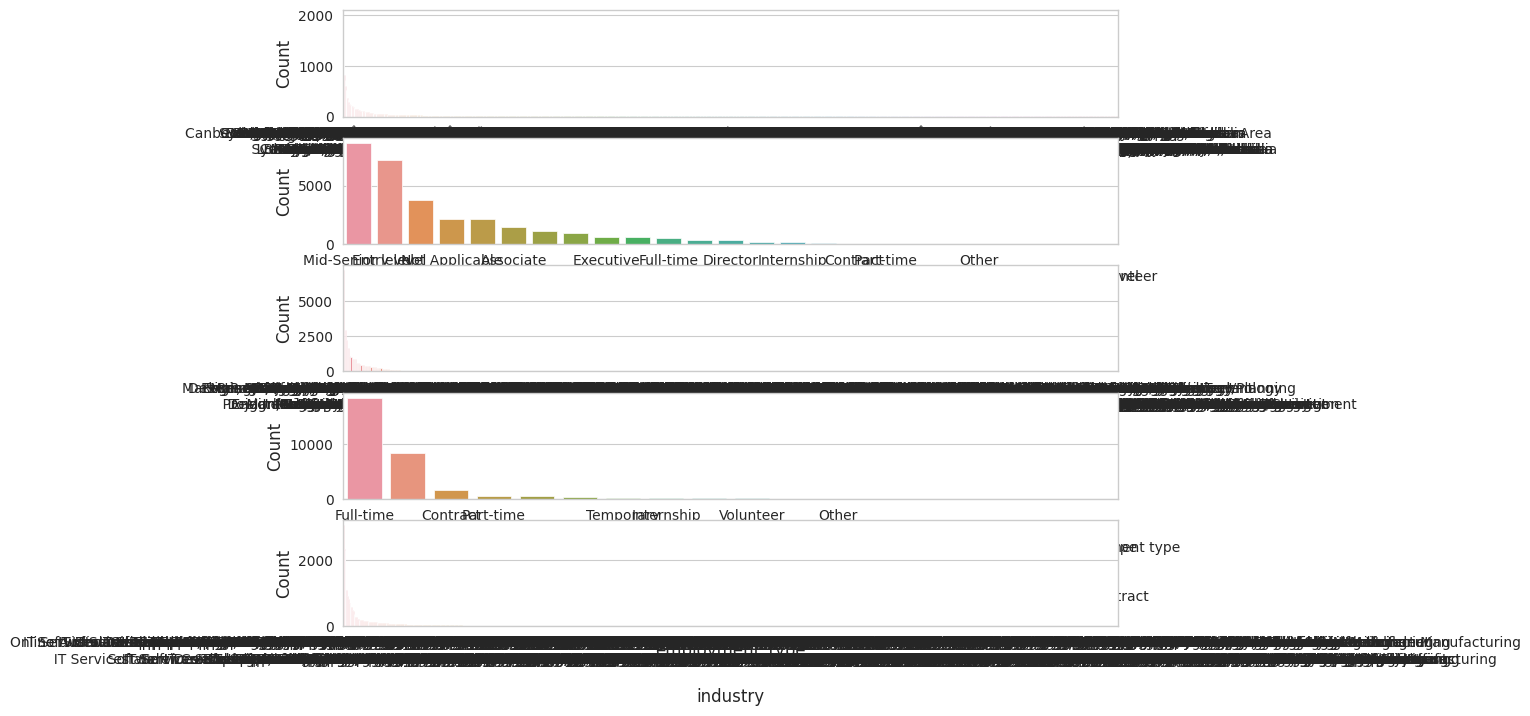

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Define the categorical columns to visualize
categorical_columns = ['location', 'seniority_level', 'job_function', 'employment_type', 'industry']

# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 8))

# Loop through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], order=df[column].value_counts().index)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

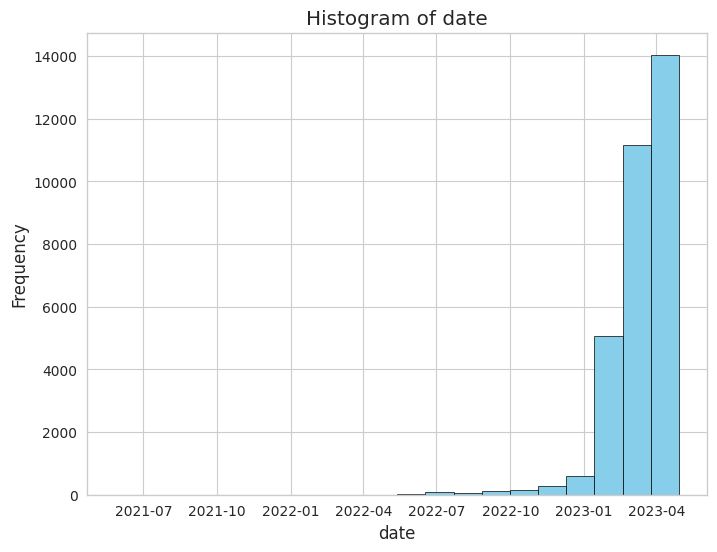

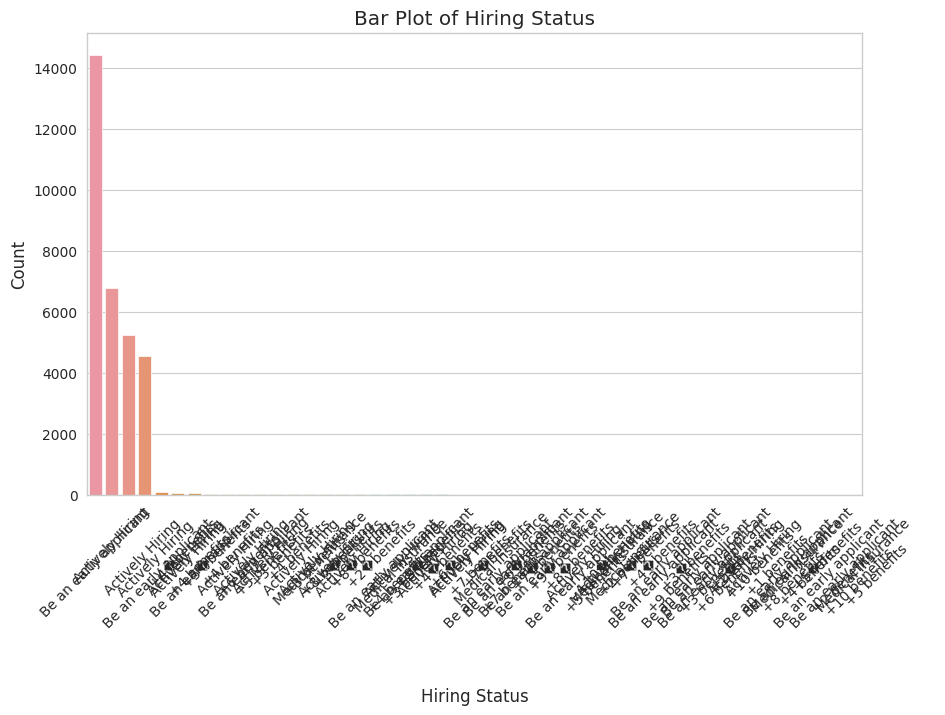

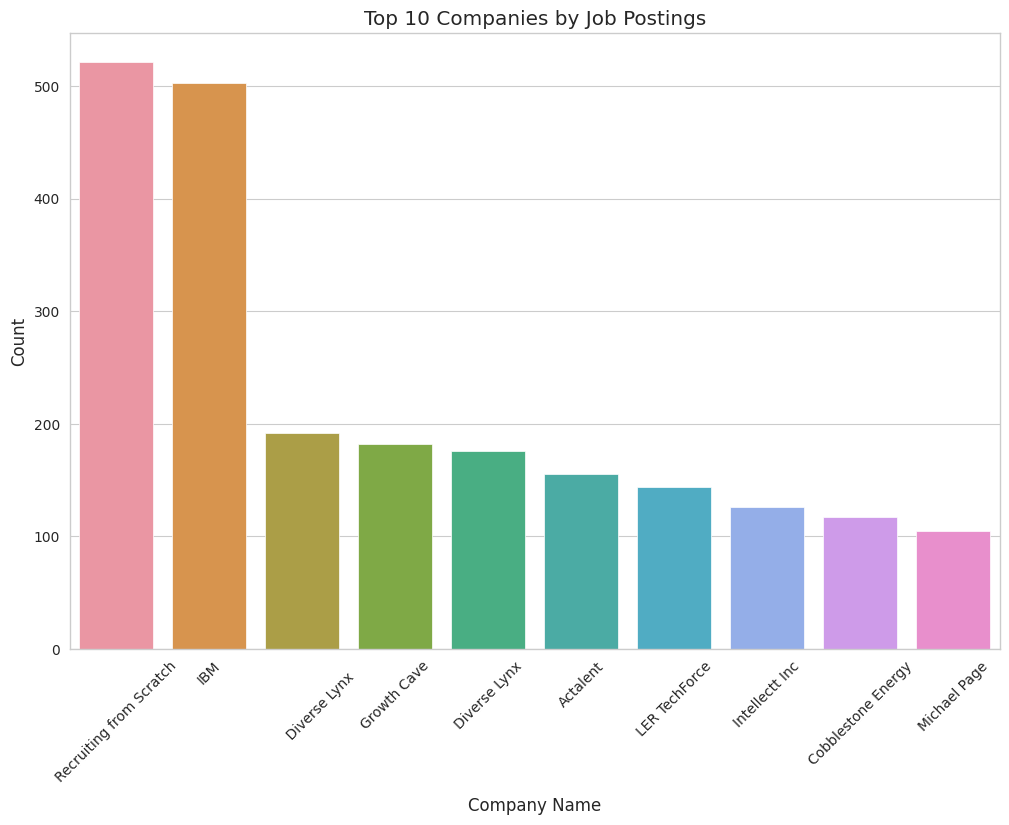

In [23]:
# Define numerical columns to visualize
numerical_columns = ['date']  # Add more numerical columns if needed

# Create histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Additional bar plots for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hiring_status', order=df['hiring_status'].value_counts().index)
plt.xlabel('Hiring Status')
plt.ylabel('Count')
plt.title('Bar Plot of Hiring Status')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='company_name', order=df['company_name'].value_counts().index[:10])
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.title('Top 10 Companies by Job Postings')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Summary statistics for numerical columns
print(df.describe())


                                date
count                          31597
mean   2023-03-12 20:52:44.199132928
min              2021-05-27 00:00:00
25%              2023-02-23 00:00:00
50%              2023-03-20 00:00:00
75%              2023-04-08 00:00:00
max              2023-04-29 00:00:00


In [25]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Check if there are numerical columns available
if len(numerical_columns) > 0:
    # Generate pairplot for numerical columns
    sns.pairplot(df[numerical_columns])
    plt.show()
else:
    print("No numerical columns found for generating pairplot.")

No numerical columns found for generating pairplot.


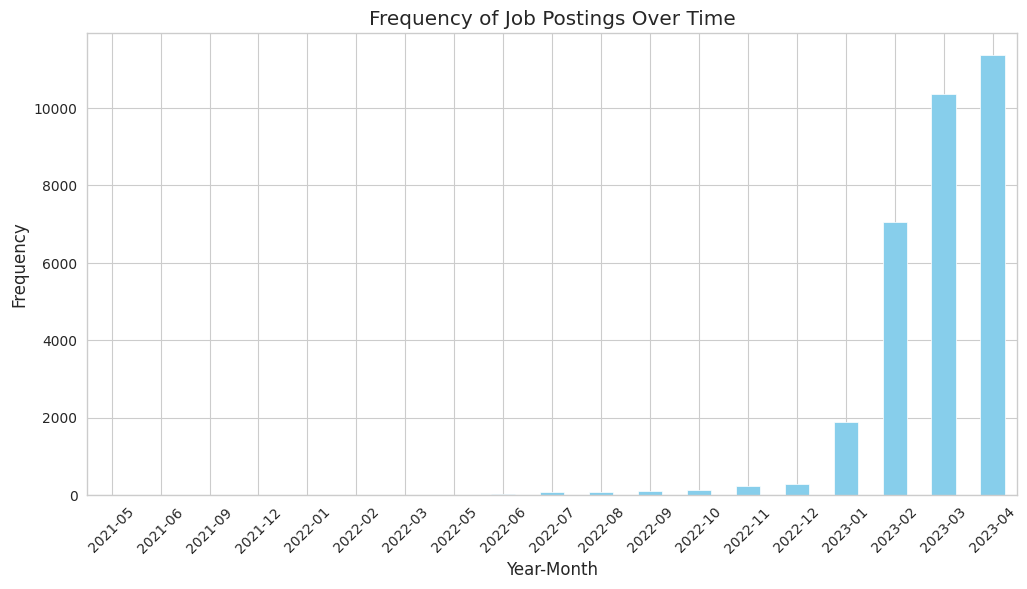

In [26]:
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year_month'] = df['date'].dt.to_period('M')  # Extract year and month
date_counts = df['year_month'].value_counts().sort_index()
date_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Frequency of Job Postings Over Time')
plt.xticks(rotation=45)
plt.show()

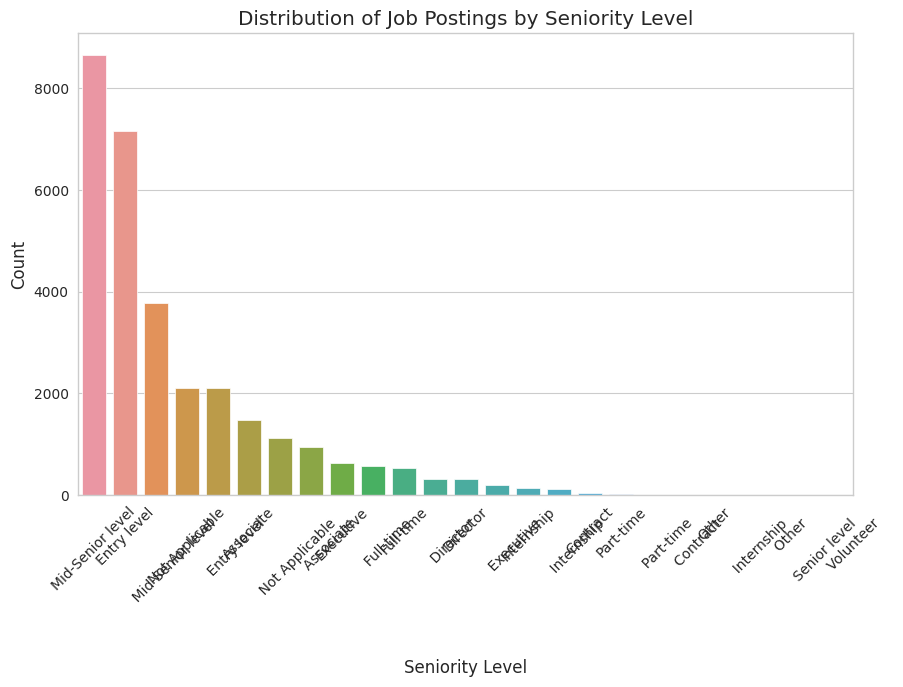

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='seniority_level', order=df['seniority_level'].value_counts().index)
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.title('Distribution of Job Postings by Seniority Level')
plt.xticks(rotation=45)
plt.show()

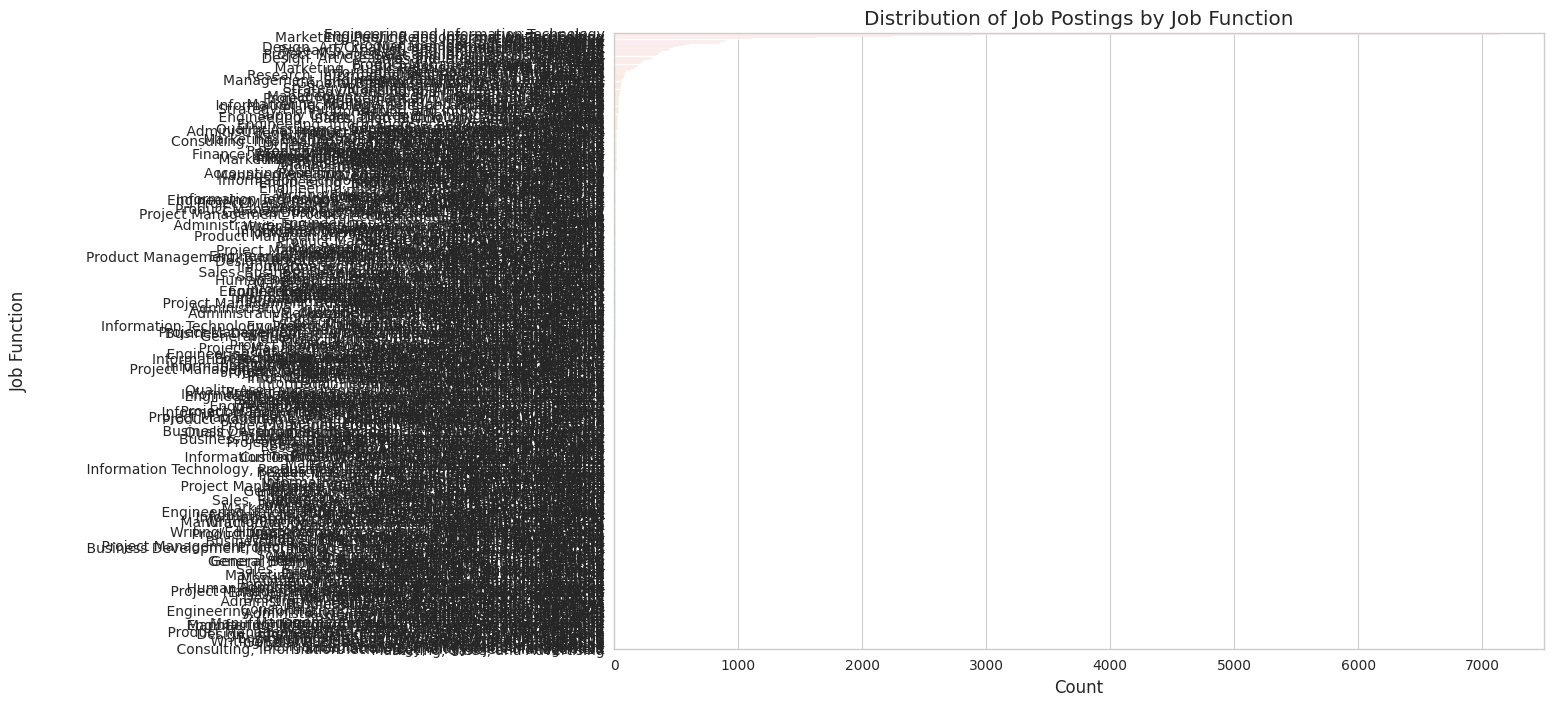

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='job_function', order=df['job_function'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Job Function')
plt.title('Distribution of Job Postings by Job Function')
plt.show()

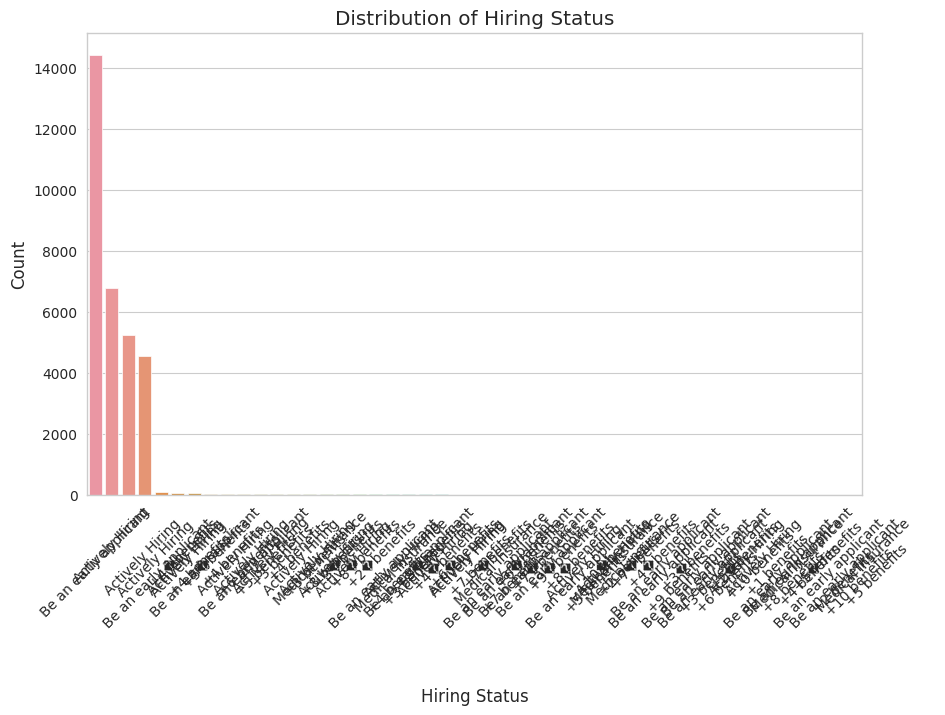

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hiring_status', order=df['hiring_status'].value_counts().index)
plt.xlabel('Hiring Status')
plt.ylabel('Count')
plt.title('Distribution of Hiring Status')
plt.xticks(rotation=45)
plt.show()

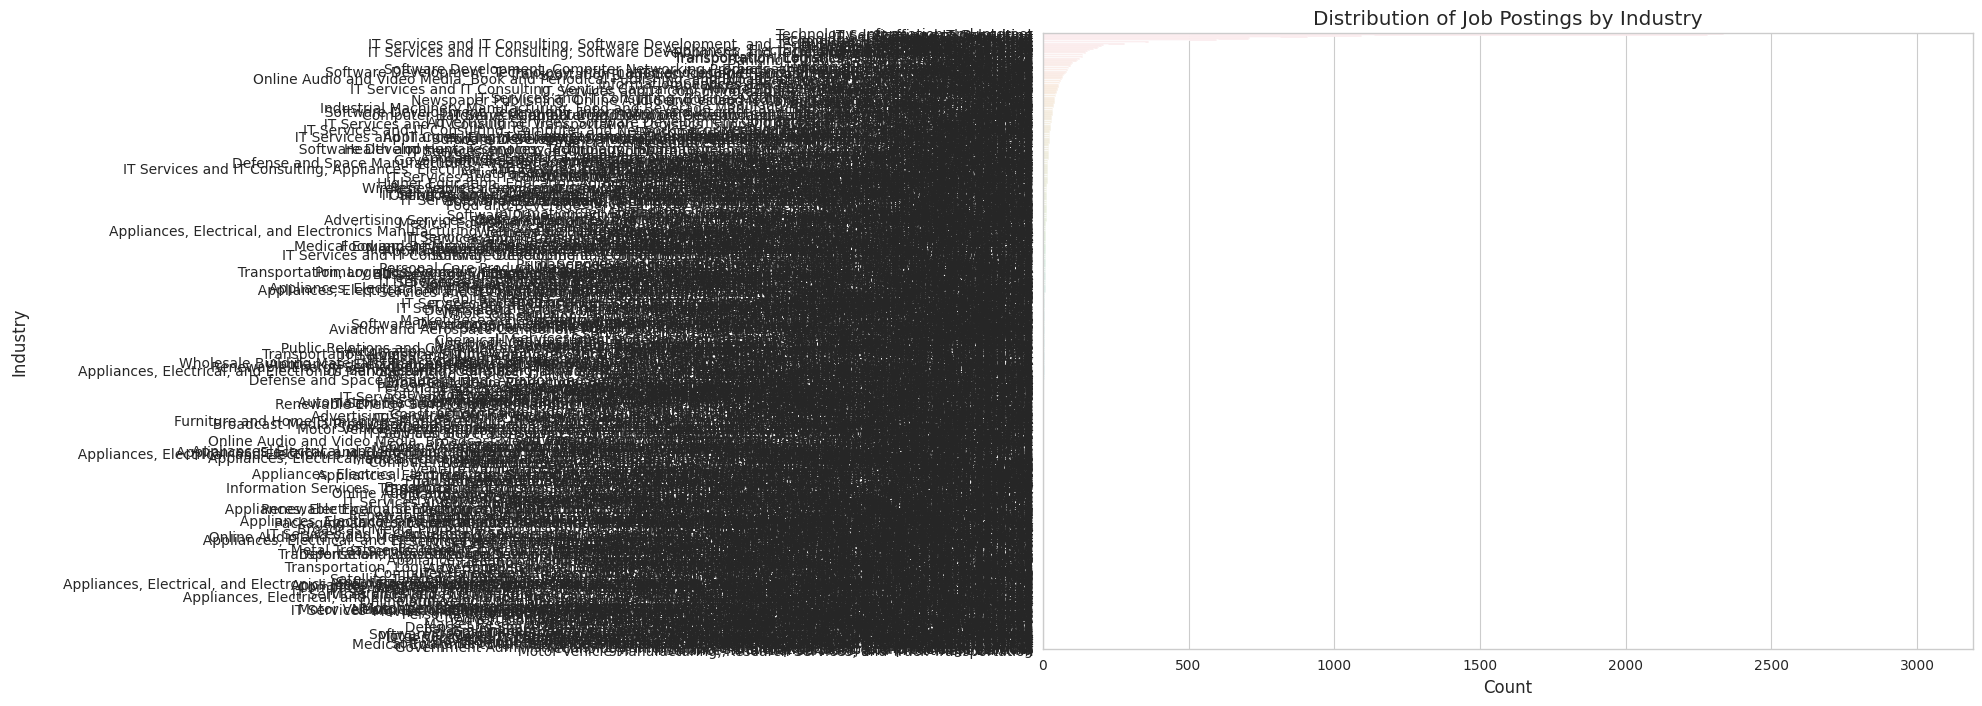

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='industry', order=df['industry'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Distribution of Job Postings by Industry')
plt.show()

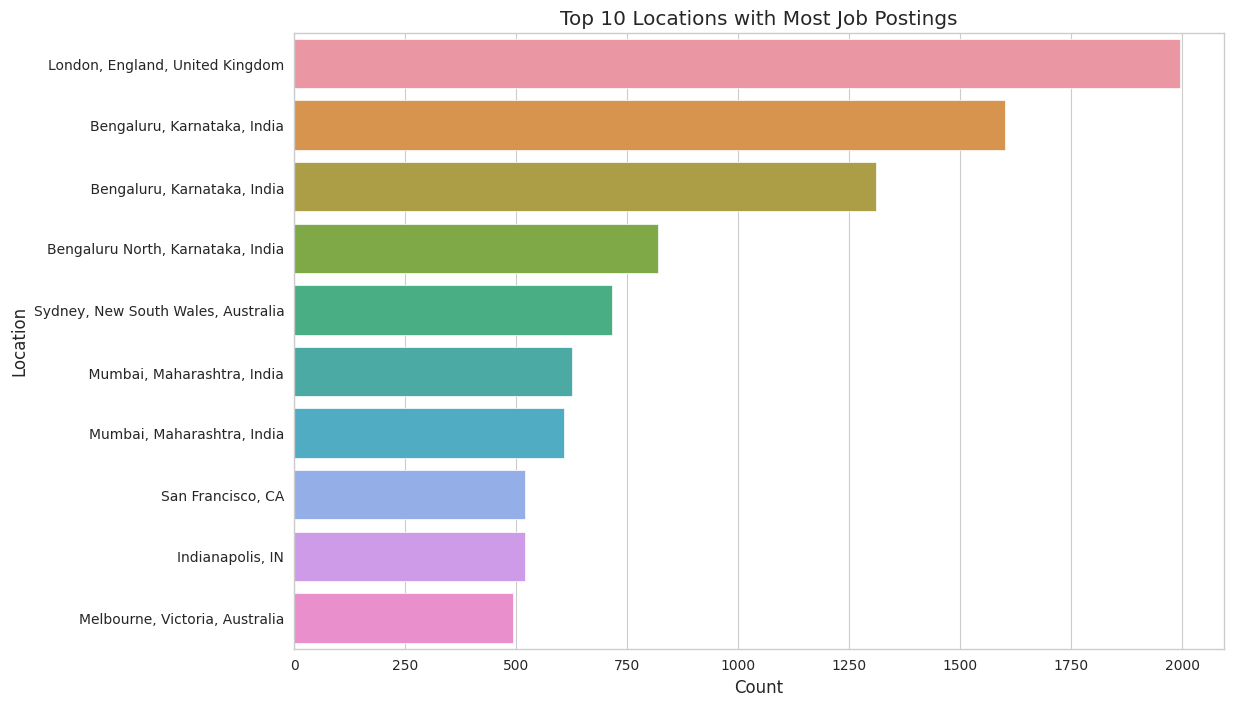

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='location', order=df['location'].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 10 Locations with Most Job Postings')
plt.show()

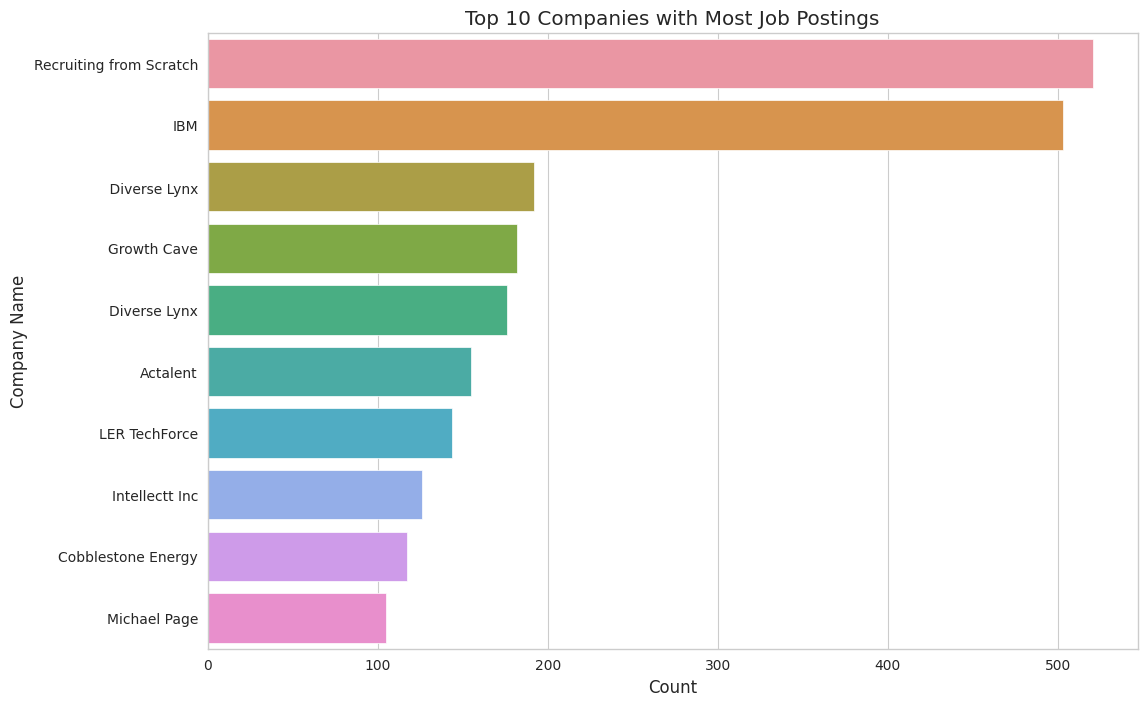

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='company_name', order=df['company_name'].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.title('Top 10 Companies with Most Job Postings')
plt.show()

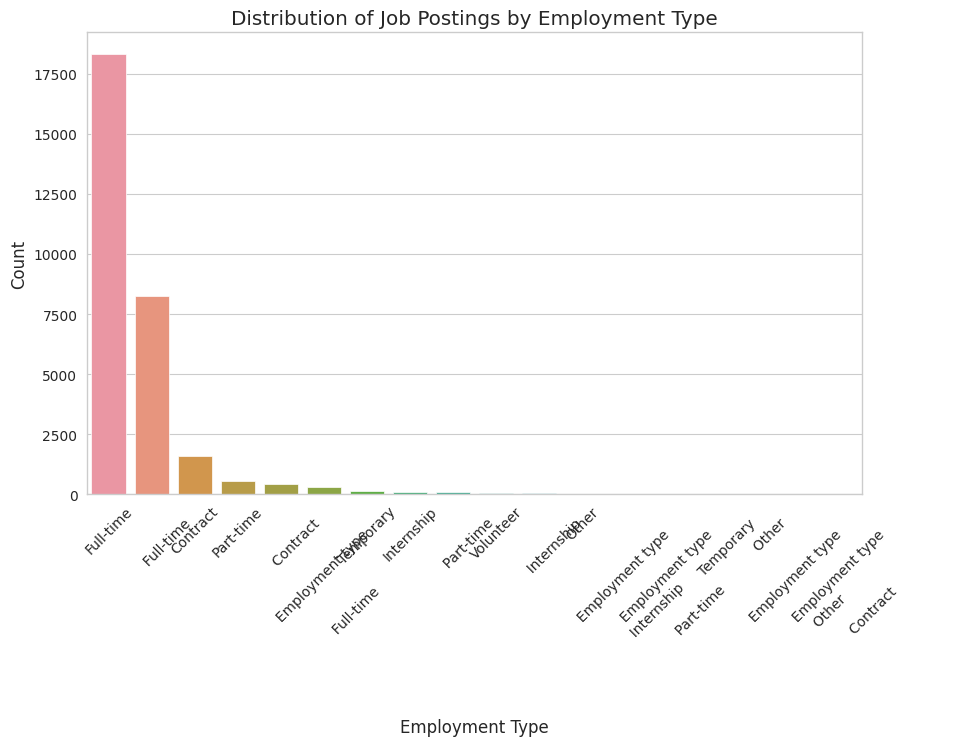

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Job Postings by Employment Type')
plt.xticks(rotation=45)
plt.show()

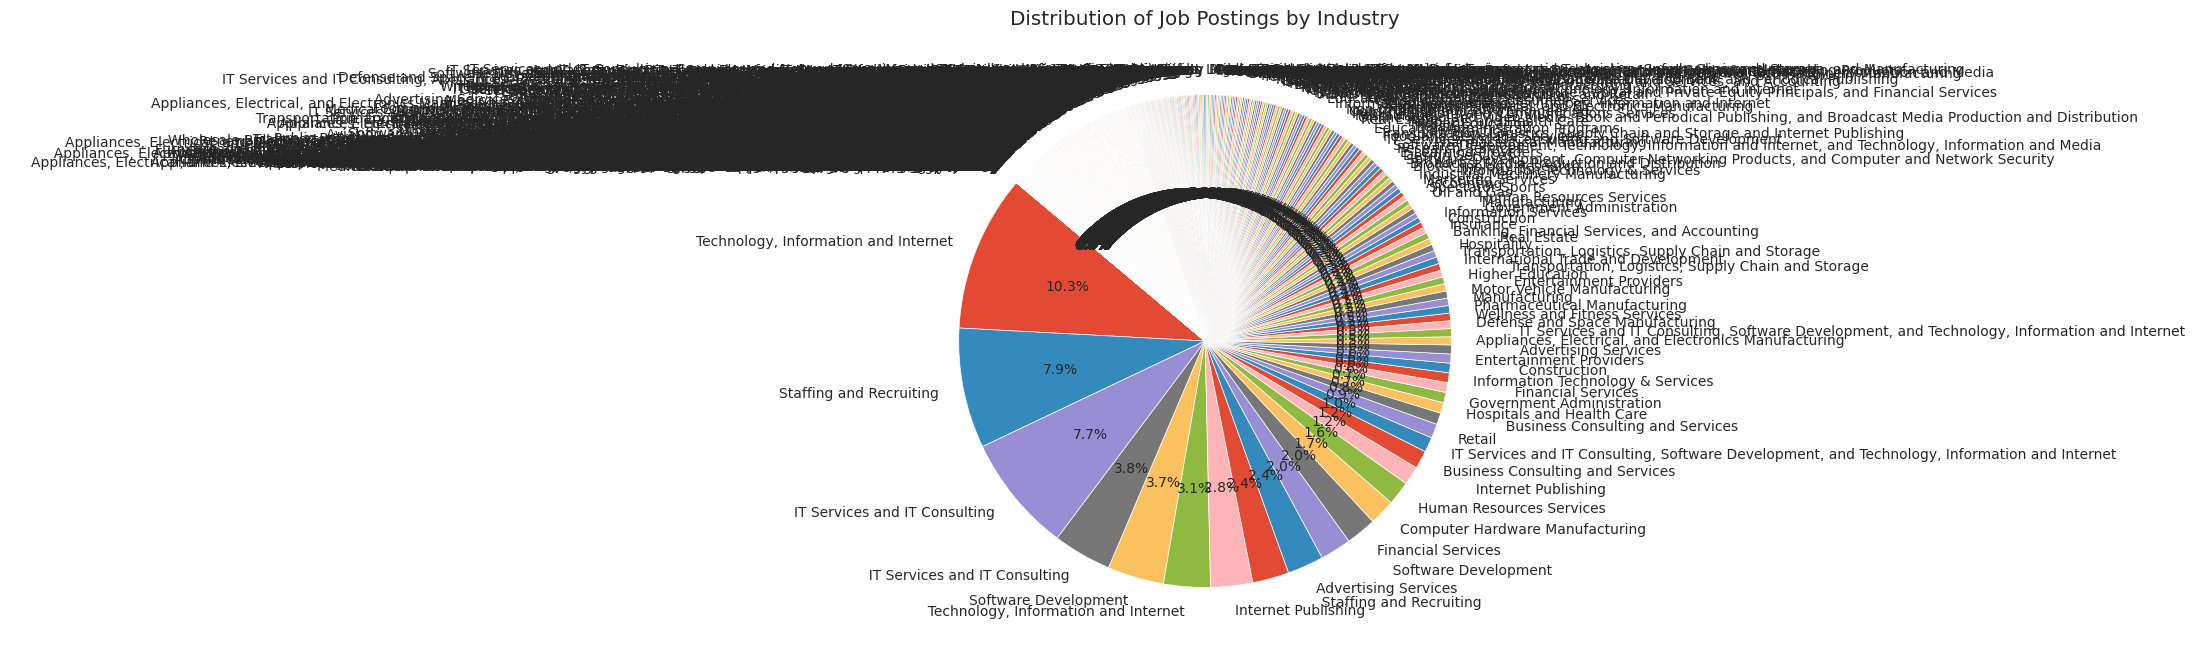

In [34]:
plt.figure(figsize=(10, 8))
df['industry'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Postings by Industry')
plt.ylabel('')
plt.show()

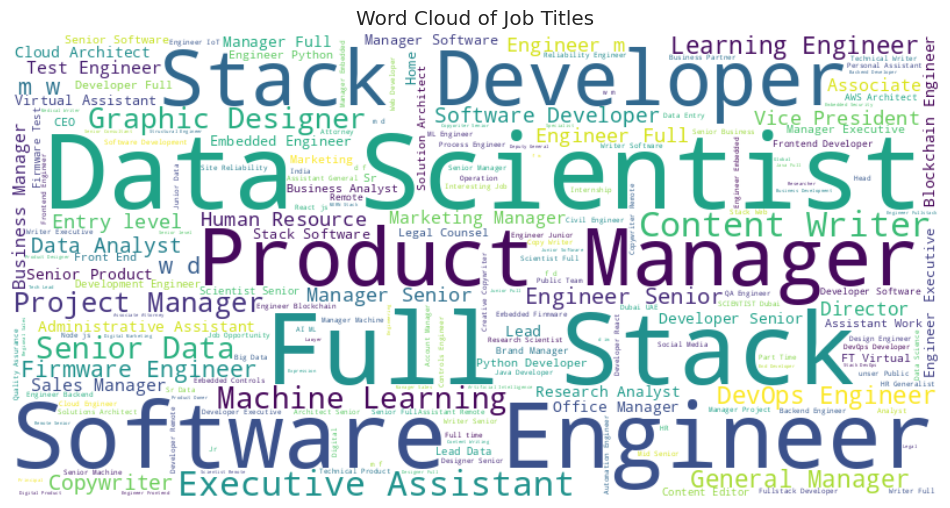

In [35]:
from wordcloud import WordCloud

# Remove non-string data from job_title column
job_titles_text = ' '.join([str(title) for title in df['job_title'] if isinstance(title, str)])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Titles')
plt.axis('off')
plt.show()

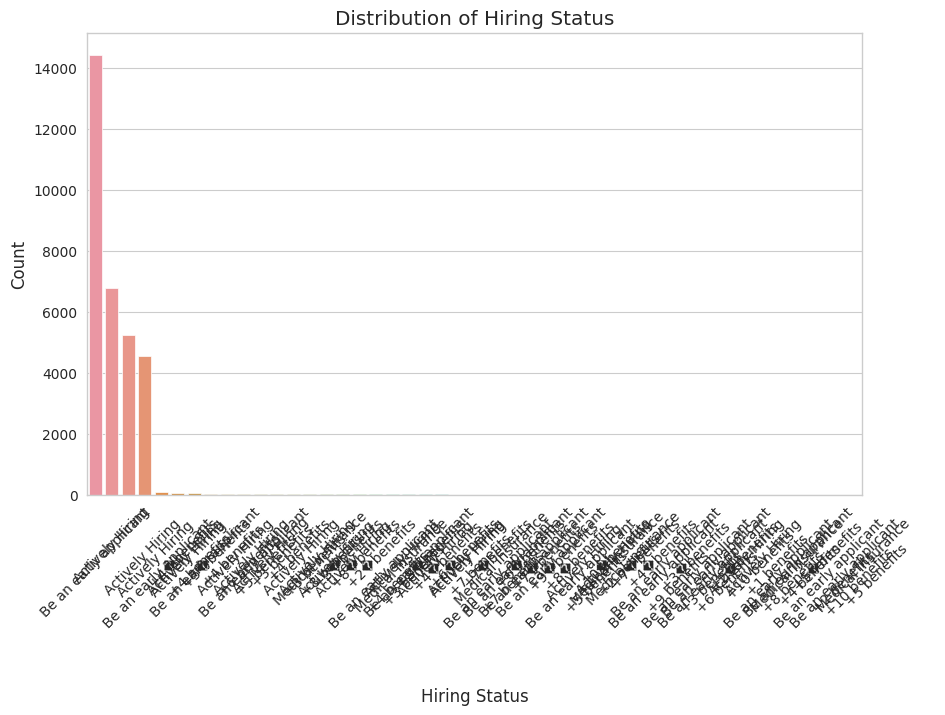

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hiring_status', order=df['hiring_status'].value_counts().index)
plt.xlabel('Hiring Status')
plt.ylabel('Count')
plt.title('Distribution of Hiring Status')
plt.xticks(rotation=45)
plt.show()

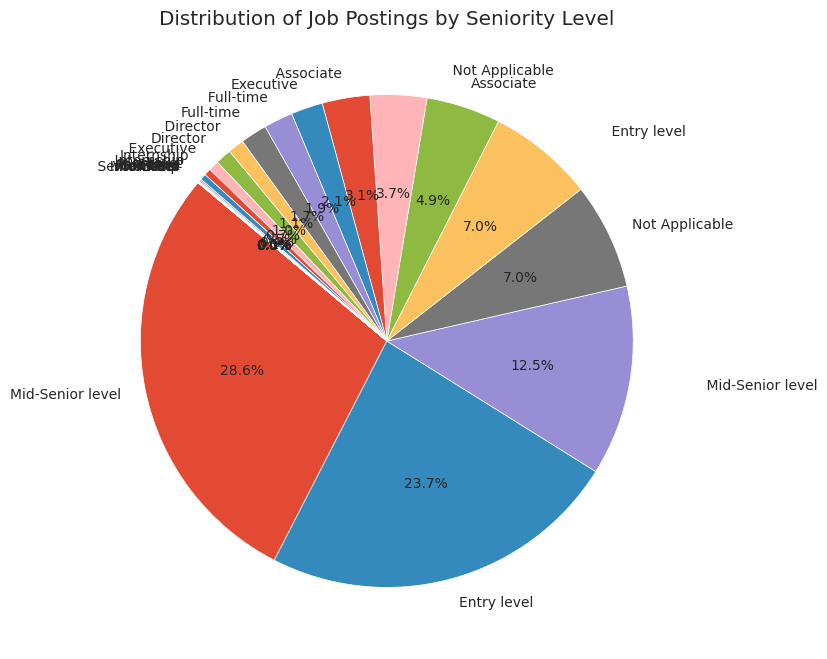

In [37]:
plt.figure(figsize=(10, 8))
df['seniority_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Postings by Seniority Level')
plt.ylabel('')
plt.show()

# Data Cleaning

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

job_title            26
company_name        940
location              9
hiring_status         0
date                  0
seniority_level    1308
job_function       1590
employment_type    1591
industry           2011
year_month            0
dtype: int64


In [39]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [40]:
# Standardize text data
df['job_title'] = df['job_title'].str.lower()
df['location'] = df['location'].str.strip()

In [41]:
# Extract year and month from 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [42]:
# One-hot encode categorical variables (example with 'employment_type' column)
df = pd.get_dummies(df, columns=['employment_type'], prefix='employment_type')

In [43]:
# Convert 'date' column to datetime (if not already)
df['date'] = pd.to_datetime(df['date'])

In [44]:
df.head()

job_title  \
0     store business manager - david jones chermside   
1                                          full-time   
2                   senior machine learning engineer   
3                              senior data scientist   
4  \n            \n        solution architect\n  ...   

                               company_name  \
0                                 M.J. Bale   
1                                  Gatesman   
2                           Redwolf + Rosch   
3                                      Bupa   
4  \n            Xybion Digital\n             

                               location  \
0       Brisbane, Queensland, Australia   
1                           Chicago, IL   
2  Adelaide, South Australia, Australia   
3        Melbourne, Victoria, Australia   
4            Chennai, Tamil Nadu, India   

                              hiring_status       date  \
0                     Be an early applicant 2023-04-13   
1                     Be an early applicant 2023-03-31   
2                     Be an early applicant 2023-04-25   
3                     Be an early applicant 2023-04-29   
4  \n         Be an early applicant\n       2023-01-26   

                              seniority_level  \
0                              Not Applicable   
1                                         NaN   
2                            Mid-Senior level   
3                                 Entry level   
4  \n            Mid-Senior level\n             

                                        job_function  \
0                     Sales and Business Development   
1                                                NaN   
2             Engineering and Information Technology   
3             Engineering and Information Technology   
4  \n            Engineering and Information Tech...   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                                NaN    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  \n          IT Services and IT Consulting, Sof...    2023-01  2023  ...   

   employment_type_\n          Other\n          \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   employment_type_\n          Part-time\n          \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   employment_type_\n          Temporary\n          employment_type_Contract  \
0                                            False                     False   
1                                            False                     False   
2                                            False                     False   
3                                            False                     False   
4                                            False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False  

In [45]:
# 3. Standardizing Text Data
df['job_title'] = df['job_title'].str.strip()
df['company_name'] = df['company_name'].str.strip()
df['location'] = df['location'].str.strip()
df['hiring_status'] = df['hiring_status'].str.strip()
df['seniority_level'] = df['seniority_level'].str.strip()
df['job_function'] = df['job_function'].str.strip()
df['industry'] = df['industry'].str.strip()

In [46]:
df.head()

job_title     company_name  \
0  store business manager - david jones chermside        M.J. Bale   
1                                       full-time         Gatesman   
2                senior machine learning engineer  Redwolf + Rosch   
3                           senior data scientist             Bupa   
4                              solution architect   Xybion Digital   

                               location          hiring_status       date  \
0       Brisbane, Queensland, Australia  Be an early applicant 2023-04-13   
1                           Chicago, IL  Be an early applicant 2023-03-31   
2  Adelaide, South Australia, Australia  Be an early applicant 2023-04-25   
3        Melbourne, Victoria, Australia  Be an early applicant 2023-04-29   
4            Chennai, Tamil Nadu, India  Be an early applicant 2023-01-26   

    seniority_level                            job_function  \
0    Not Applicable          Sales and Business Development   
1               NaN                                     NaN   
2  Mid-Senior level  Engineering and Information Technology   
3       Entry level  Engineering and Information Technology   
4  Mid-Senior level  Engineering and Information Technology   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                                NaN    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  IT Services and IT Consulting, Software Develo...    2023-01  2023  ...   

   employment_type_\n          Other\n          \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   employment_type_\n          Part-time\n          \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   employment_type_\n          Temporary\n          employment_type_Contract  \
0                                            False                     False   
1                                            False                     False   
2                                            False                     False   
3                                            False                     False   
4                                            False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Volunteer  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                      False                      False  

[5 rows x 29 columns]

In [47]:
# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['job_title', 'company_name', 'location', 'hiring_status', 'seniority_level', 'job_function', 'industry']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Drop rows with missing dates
df.dropna(subset=['date'], inplace=True)

# Confirm missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing Values after cleaning:\n", missing_values_after)

Missing Values after cleaning:
 job_title                                                                                                            0
company_name                                                                                                         0
location                                                                                                             0
hiring_status                                                                                                        0
date                                                                                                                 0
seniority_level                                                                                                      0
job_function                                                                                                         0
industry                                                                                                             0
year_month      

In [48]:
df.head()

job_title     company_name  \
0  store business manager - david jones chermside        M.J. Bale   
1                                       full-time         Gatesman   
2                senior machine learning engineer  Redwolf + Rosch   
3                           senior data scientist             Bupa   
4                              solution architect   Xybion Digital   

                               location          hiring_status       date  \
0       Brisbane, Queensland, Australia  Be an early applicant 2023-04-13   
1                           Chicago, IL  Be an early applicant 2023-03-31   
2  Adelaide, South Australia, Australia  Be an early applicant 2023-04-25   
3        Melbourne, Victoria, Australia  Be an early applicant 2023-04-29   
4            Chennai, Tamil Nadu, India  Be an early applicant 2023-01-26   

    seniority_level                            job_function  \
0    Not Applicable          Sales and Business Development   
1           Unknown                                 Unknown   
2  Mid-Senior level  Engineering and Information Technology   
3       Entry level  Engineering and Information Technology   
4  Mid-Senior level  Engineering and Information Technology   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                            Unknown    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  IT Services and IT Consulting, Software Develo...    2023-01  2023  ...   

   employment_type_\n          Other\n          \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   employment_type_\n          Part-time\n          \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   employment_type_\n          Temporary\n          employment_type_Contract  \
0                                            False                     False   
1                                            False                     False   
2                                            False                     False   
3                                            False                     False   
4                                            False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Volunteer  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                      False                      False  

[5 rows x 29 columns]

In [49]:
df.isnull().sum()

job_title                                                                                                            0
company_name                                                                                                         0
location                                                                                                             0
hiring_status                                                                                                        0
date                                                                                                                 0
seniority_level                                                                                                      0
job_function                                                                                                         0
industry                                                                                                             0
year_month                                      

In [50]:
df.columns

Index(['job_title', 'company_name', 'location', 'hiring_status', 'date',
       'seniority_level', 'job_function', 'industry', 'year_month', 'year',
       'month',
       'employment_type_\n        \n          Employment type\n        \n        \n          Contract\n        \n      ',
       'employment_type_\n        \n          Employment type\n        \n        \n          Full-time\n        \n      ',
       'employment_type_\n        \n          Employment type\n        \n        \n          Internship\n        \n      ',
       'employment_type_\n        \n          Employment type\n        \n        \n          Other\n        \n      ',
       'employment_type_\n        \n          Employment type\n        \n        \n          Part-time\n        \n      ',
       'employment_type_\n          Contract\n        ',
       'employment_type_\n          Full-time\n        ',
       'employment_type_\n          Internship\n        ',
       'employment_type_\n          Other\n       

In [51]:
# Rename employment type columns
df.rename(columns={
    'employment_type_\n        \n          Employment type\n        \n        \n          Contract\n        \n      ': 'employment_type_Contract',
    'employment_type_\n        \n          Employment type\n        \n        \n          Full-time\n        \n      ': 'employment_type_Full-time',
    'employment_type_\n        \n          Employment type\n        \n        \n          Internship\n        \n      ': 'employment_type_Internship',
    'employment_type_\n        \n          Employment type\n        \n        \n          Other\n        \n      ': 'employment_type_Other',
    'employment_type_\n        \n          Employment type\n        \n        \n          Part-time\n        \n      ': 'employment_type_Part-time',
    'employment_type_\n          Contract\n        ': 'employment_type_Contract',
    'employment_type_\n          Full-time\n        ': 'employment_type_Full-time',
    'employment_type_\n          Internship\n        ': 'employment_type_Internship',
    'employment_type_\n          Other\n        ': 'employment_type_Other',
    'employment_type_\n          Part-time\n        ': 'employment_type_Part-time',
    'employment_type_\n          Temporary\n        ': 'employment_type_Temporary',
    'employment_type_Contract': 'employment_type_Contract',
    'employment_type_Full-time': 'employment_type_Full-time',
    'employment_type_Internship': 'employment_type_Internship',
    'employment_type_Other': 'employment_type_Other',
    'employment_type_Part-time': 'employment_type_Part-time',
    'employment_type_Temporary': 'employment_type_Temporary',
    'employment_type_Volunteer': 'employment_type_Volunteer'
}, inplace=True)


In [52]:
df.head()

job_title     company_name  \
0  store business manager - david jones chermside        M.J. Bale   
1                                       full-time         Gatesman   
2                senior machine learning engineer  Redwolf + Rosch   
3                           senior data scientist             Bupa   
4                              solution architect   Xybion Digital   

                               location          hiring_status       date  \
0       Brisbane, Queensland, Australia  Be an early applicant 2023-04-13   
1                           Chicago, IL  Be an early applicant 2023-03-31   
2  Adelaide, South Australia, Australia  Be an early applicant 2023-04-25   
3        Melbourne, Victoria, Australia  Be an early applicant 2023-04-29   
4            Chennai, Tamil Nadu, India  Be an early applicant 2023-01-26   

    seniority_level                            job_function  \
0    Not Applicable          Sales and Business Development   
1           Unknown                                 Unknown   
2  Mid-Senior level  Engineering and Information Technology   
3       Entry level  Engineering and Information Technology   
4  Mid-Senior level  Engineering and Information Technology   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                            Unknown    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  IT Services and IT Consulting, Software Develo...    2023-01  2023  ...   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                      False   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Contract  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                      False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Volunteer  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                      False                      False  

[5 rows x 29 columns]

# Feature Engineering

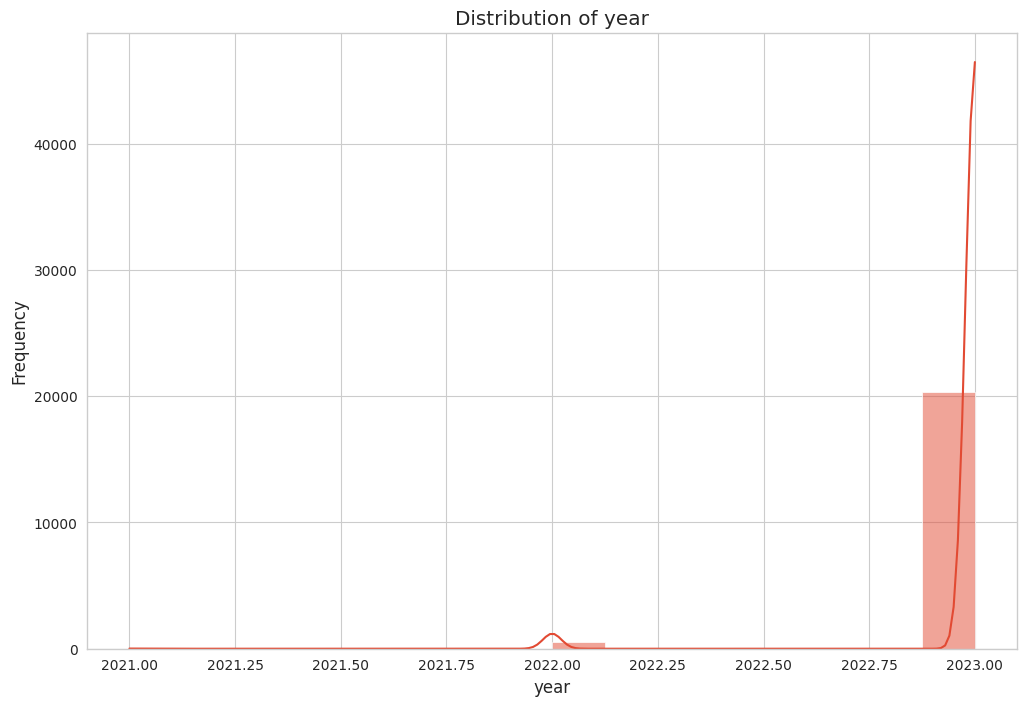

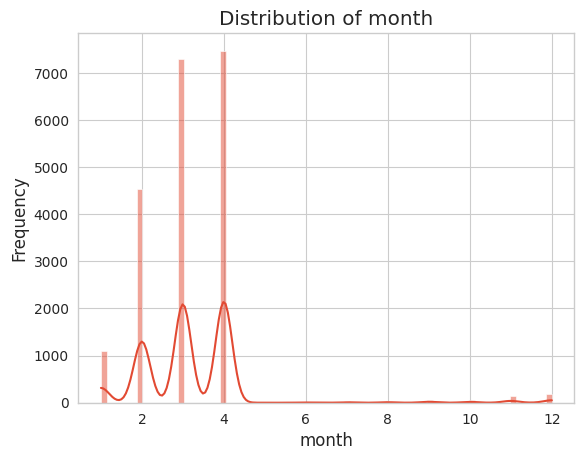

In [53]:
# Drop the 'date' column from the DataFrame before plotting histograms or performing other numerical operations
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    if column != 'date':  # Exclude the 'date' column
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [54]:
df.head()

job_title     company_name  \
0  store business manager - david jones chermside        M.J. Bale   
1                                       full-time         Gatesman   
2                senior machine learning engineer  Redwolf + Rosch   
3                           senior data scientist             Bupa   
4                              solution architect   Xybion Digital   

                               location          hiring_status       date  \
0       Brisbane, Queensland, Australia  Be an early applicant 2023-04-13   
1                           Chicago, IL  Be an early applicant 2023-03-31   
2  Adelaide, South Australia, Australia  Be an early applicant 2023-04-25   
3        Melbourne, Victoria, Australia  Be an early applicant 2023-04-29   
4            Chennai, Tamil Nadu, India  Be an early applicant 2023-01-26   

    seniority_level                            job_function  \
0    Not Applicable          Sales and Business Development   
1           Unknown                                 Unknown   
2  Mid-Senior level  Engineering and Information Technology   
3       Entry level  Engineering and Information Technology   
4  Mid-Senior level  Engineering and Information Technology   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                            Unknown    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  IT Services and IT Consulting, Software Develo...    2023-01  2023  ...   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                      False   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Contract  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                      False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Volunteer  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                      False                      False  

[5 rows x 29 columns]

In [55]:
df.head()

job_title     company_name  \
0  store business manager - david jones chermside        M.J. Bale   
1                                       full-time         Gatesman   
2                senior machine learning engineer  Redwolf + Rosch   
3                           senior data scientist             Bupa   
4                              solution architect   Xybion Digital   

                               location          hiring_status       date  \
0       Brisbane, Queensland, Australia  Be an early applicant 2023-04-13   
1                           Chicago, IL  Be an early applicant 2023-03-31   
2  Adelaide, South Australia, Australia  Be an early applicant 2023-04-25   
3        Melbourne, Victoria, Australia  Be an early applicant 2023-04-29   
4            Chennai, Tamil Nadu, India  Be an early applicant 2023-01-26   

    seniority_level                            job_function  \
0    Not Applicable          Sales and Business Development   
1           Unknown                                 Unknown   
2  Mid-Senior level  Engineering and Information Technology   
3       Entry level  Engineering and Information Technology   
4  Mid-Senior level  Engineering and Information Technology   

                                            industry year_month  year  ...  \
0                          Government Administration    2023-04  2023  ...   
1                                            Unknown    2023-03  2023  ...   
2                                Internet Publishing    2023-04  2023  ...   
3               Technology, Information and Internet    2023-04  2023  ...   
4  IT Services and IT Consulting, Software Develo...    2023-01  2023  ...   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                      False   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Contract  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                      False                     False   

   employment_type_Full-time  employment_type_Internship  \
0                       True                       False   
1                      False                       False   
2                      False                       False   
3                       True                       False   
4                      False                       False   

   employment_type_Other  employment_type_Part-time  \
0                  False                      False   
1                  False                      False   
2                  False                       True   
3                  False                      False   
4                  False                      False   

   employment_type_Temporary  employment_type_Volunteer  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                      False                      False  

[5 rows x 29 columns]

In [56]:
df.shape

(20904, 29)

           year     month
year   1.000000 -0.765084
month -0.765084  1.000000


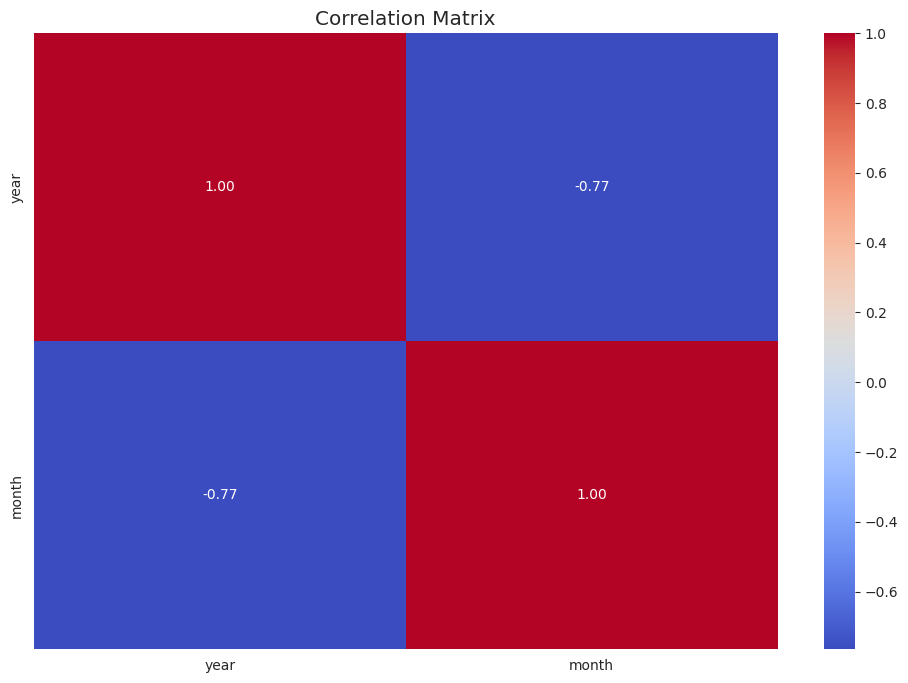

In [57]:
# Exclude non-numeric columns such as 'date' from correlation analysis
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [58]:
df["date"]

0       2023-04-13
1       2023-03-31
2       2023-04-25
3       2023-04-29
4       2023-01-26
           ...    
31588   2023-01-29
31589   2023-03-09
31592   2023-02-03
31593   2023-03-09
31595   2023-04-13
Name: date, Length: 20904, dtype: datetime64[ns]

In [59]:
df.columns

Index(['job_title', 'company_name', 'location', 'hiring_status', 'date',
       'seniority_level', 'job_function', 'industry', 'year_month', 'year',
       'month', 'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Internship', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Contract',
       'employment_type_Full-time', 'employment_type_Internship',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'employment_type_Contract',
       'employment_type_Full-time', 'employment_type_Internship',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'employment_type_Volunteer'],
      dtype='object')

# Sincerely, Dr. Eslam Fouad.